In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned_UPDATE.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:

## Encoding
df["Classes"] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## dependent independent Features
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [15]:
## feature selection on the basis of correlation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


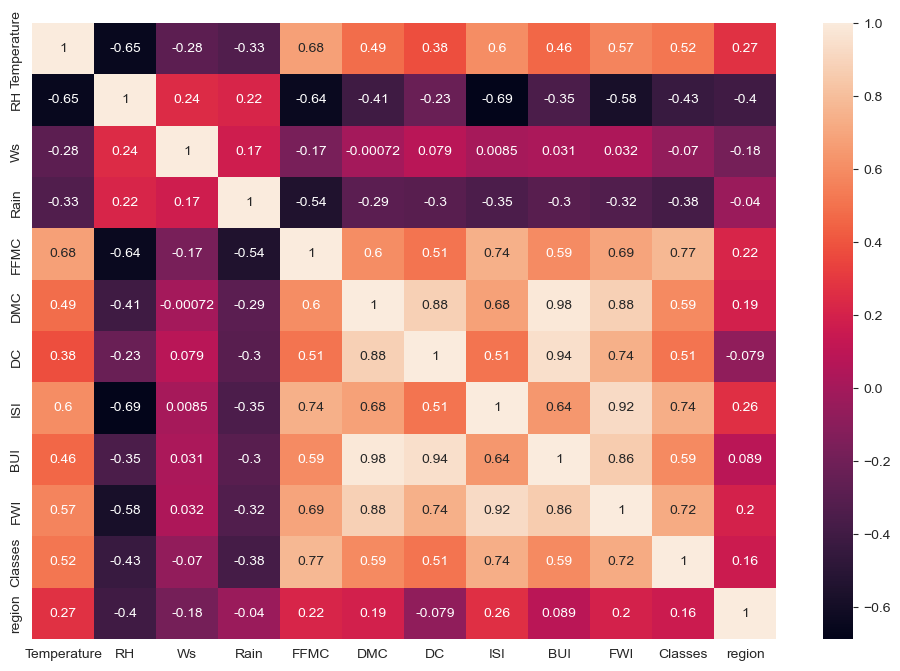

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_feature = correlation(X_train, 0.85)

In [19]:
corr_feature

{'BUI', 'DC'}

In [20]:
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

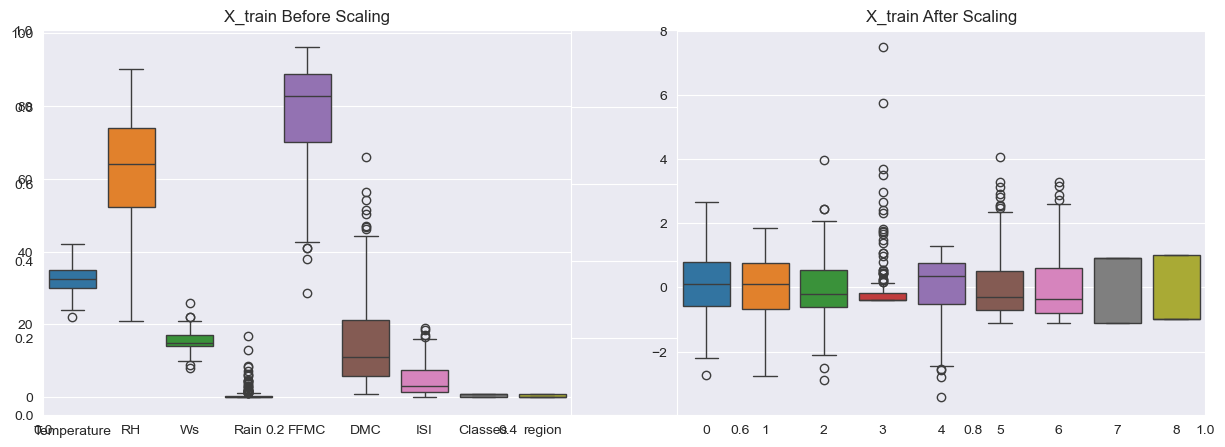

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
lin = LinearRegression()
lin.fit(X_train_scaled,y_train)
predict = lin.predict(X_test_scaled)
print("mean absolute erron",mean_absolute_error(y_test,predict))
print("R2 score",r2_score(y_test,predict))


mean absolute erron 0.546823646524999
R2 score 0.9847657384266951


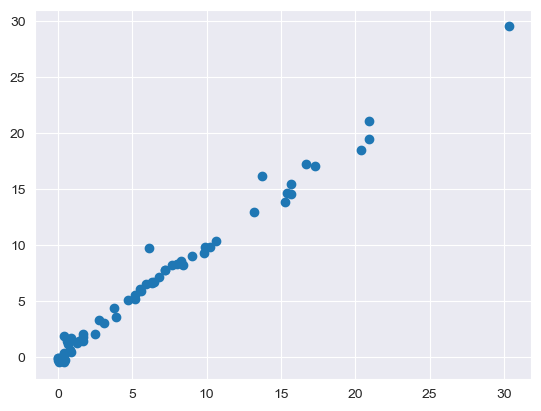

In [25]:
plt.scatter(y_test,predict)
plt.show()

# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
predict = lasso.predict(X_test_scaled)
print("mean absolute erron",mean_absolute_error(y_test,predict))
print("R2 score",r2_score(y_test,predict))

mean absolute erron 1.1331759949144082
R2 score 0.9492020263112388


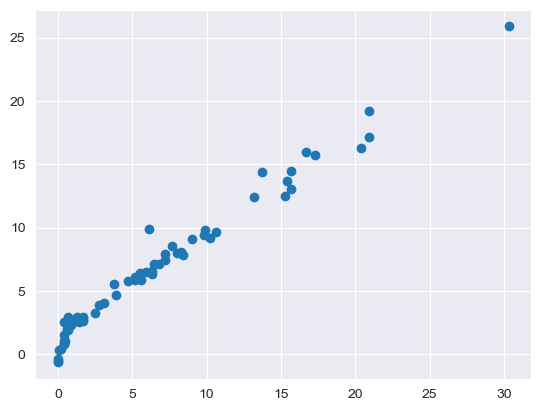

In [27]:
plt.scatter(y_test,predict)
plt.show()

# Cross validation Lasso

In [28]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [29]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [30]:
lassocv.alpha_

0.05725391318234408

In [31]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

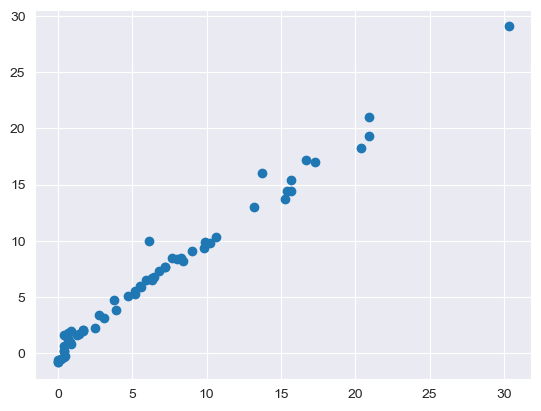

In [32]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()

In [33]:
print("mean absolute erron",mean_absolute_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

mean absolute erron 0.6199701158263431
R2 score 0.9820946715928275


In [34]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

# Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
predict = ridge.predict(X_test_scaled)
print("mean absolute erron",mean_absolute_error(y_test,predict))
print("R2 score",r2_score(y_test,predict))

mean absolute erron 0.5642305340105711
R2 score 0.9842993364555512


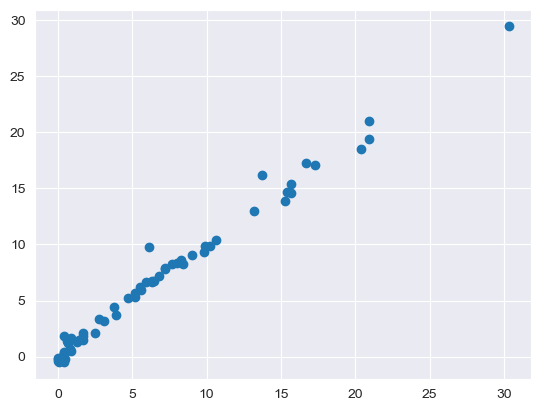

In [36]:
plt.scatter(y_test,predict)
plt.show()

# RidgeCV

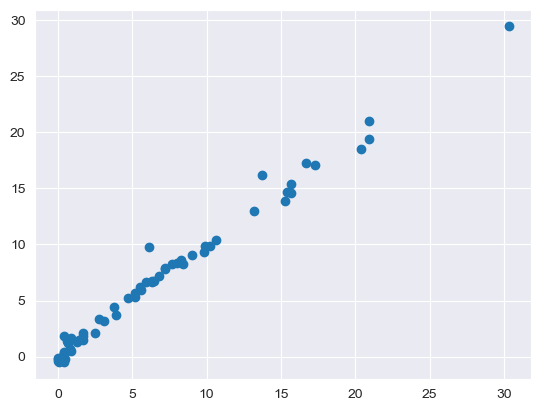

Mean absolute error 0.5642305340105711
R2 Score 0.9842993364555512


In [37]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [38]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# ElasticNet Regression

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
enet = ElasticNet()
enet.fit(X_train_scaled,y_train)
predict = enet.predict(X_test_scaled)
print("mean absolute erron",mean_absolute_error(y_test,predict))
print("R2 score",r2_score(y_test,predict))

mean absolute erron 1.8822353634896
R2 score 0.8753460589519703


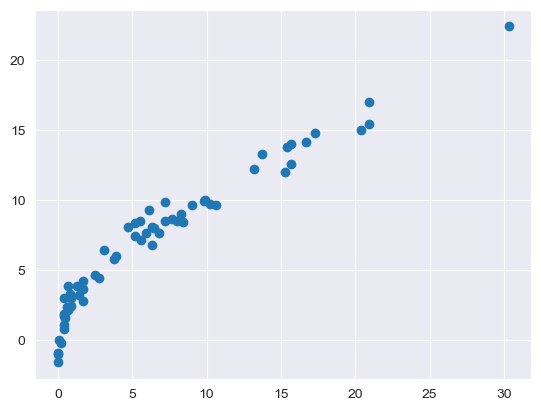

In [40]:
plt.scatter(y_test,predict)
plt.show()

# ElasticNetCV

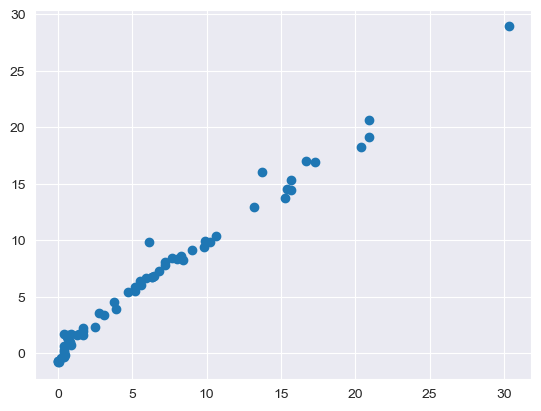

Mean absolute error 0.6575946731430904
R2 Score 0.9814217587854941


In [41]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [42]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [43]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

# pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [45]:
import pickle
pickle.dump(ridge, open("flask/models/ridge.pkl", "wb"))

In [47]:
model=pickle.load(open('flask/models/ridge.pkl', 'rb'))

In [49]:
model.predict(X_test_scaled)

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])